In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

# 加载数据
X, y = load_boston(return_X_y=True)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 训练模型
model = LinearRegression()
model.fit(X_train, y_train)


D:\ANACONDA3\ANACONDA3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

LinearRegression()

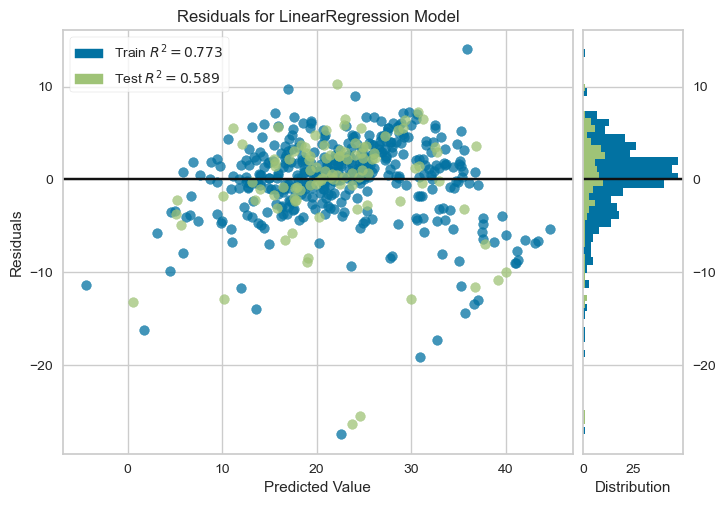

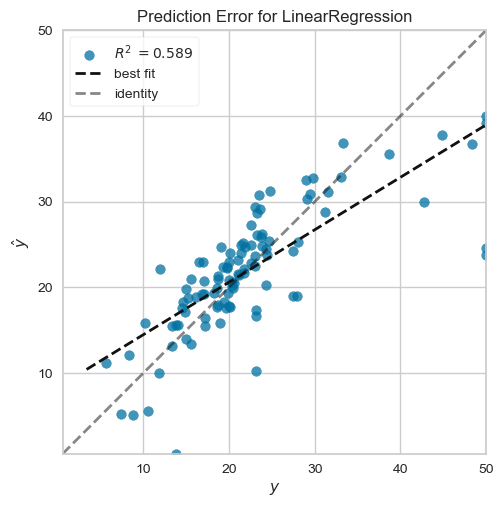

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [13]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

# 残差图
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # 训练数据
visualizer.score(X_test, y_test)  # 测试数据
visualizer.show()  # 展示图像
# 创建和训练预测误差可视化
pe_visualizer = PredictionError(model)
pe_visualizer.fit(X_train, y_train)
pe_visualizer.score(X_test, y_test)
pe_visualizer.show()


In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 加载鸢尾花数据集
iris = load_iris()
X, y = iris.data, iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 创建逻辑回归模型
model = LogisticRegression(max_iter=200)

# 训练模型
model.fit(X_train, y_train)

# 返回训练好的模型
model

LogisticRegression(max_iter=200)

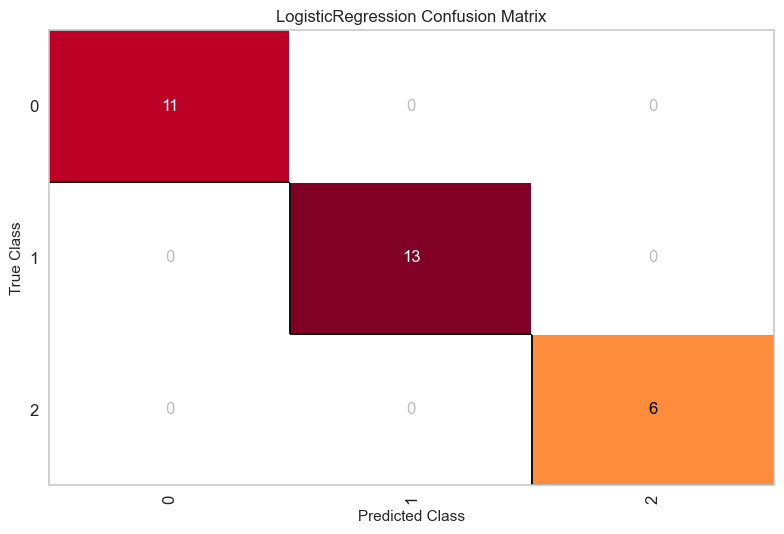

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [15]:
from yellowbrick.classifier import ConfusionMatrix

# 混淆矩阵
cm = ConfusionMatrix(model, classes=[0,1,2])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()



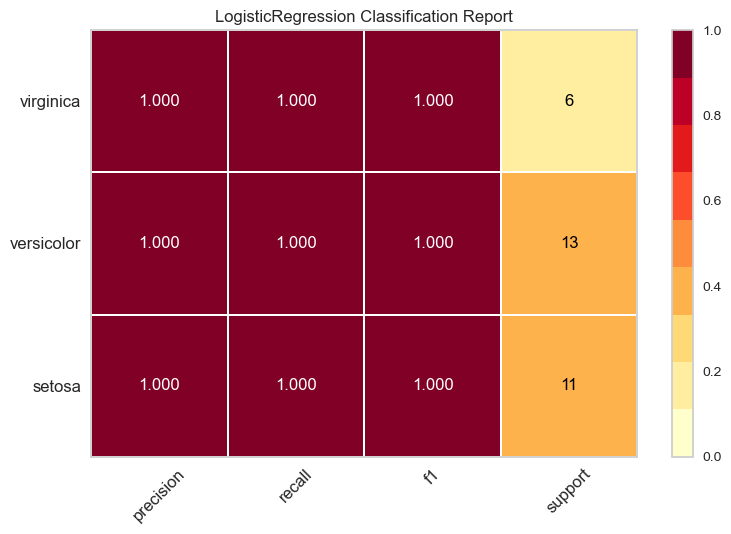

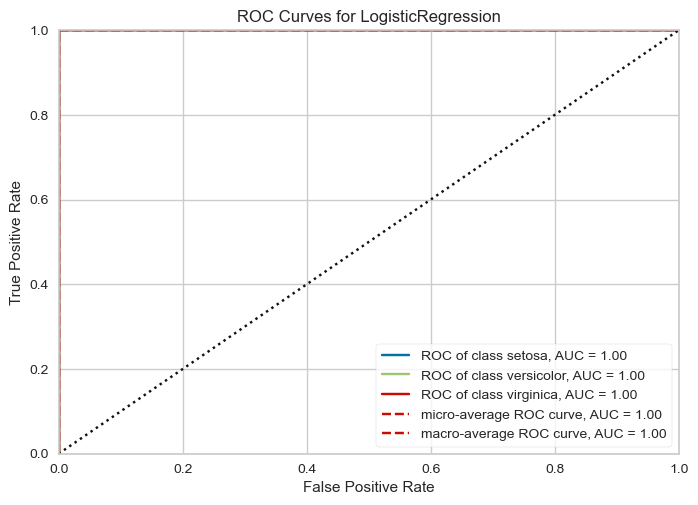

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [16]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

# 创建分类报告可视化
visualizer = ClassificationReport(model, classes=iris.target_names, support=True)

# 训练分类报告可视化并显示
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()  # 展示分类报告

# 创建 ROC 曲线可视化
roc_auc_visualizer = ROCAUC(model, classes=iris.target_names)

# 训练 ROC 曲线可视化并显示
roc_auc_visualizer.fit(X_train, y_train)
roc_auc_visualizer.score(X_test, y_test)
roc_auc_visualizer.show()  # 展示 ROC 曲线

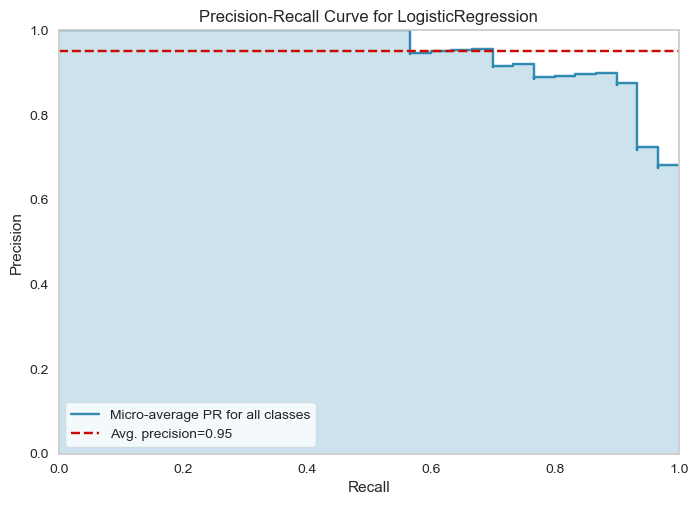

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [17]:
from yellowbrick.classifier import PrecisionRecallCurve
# 创建精确率-召回率曲线可视化
prc_visualizer = PrecisionRecallCurve(model)
prc_visualizer.fit(X_train, y_train)
prc_visualizer.score(X_test, y_test)
prc_visualizer.show()

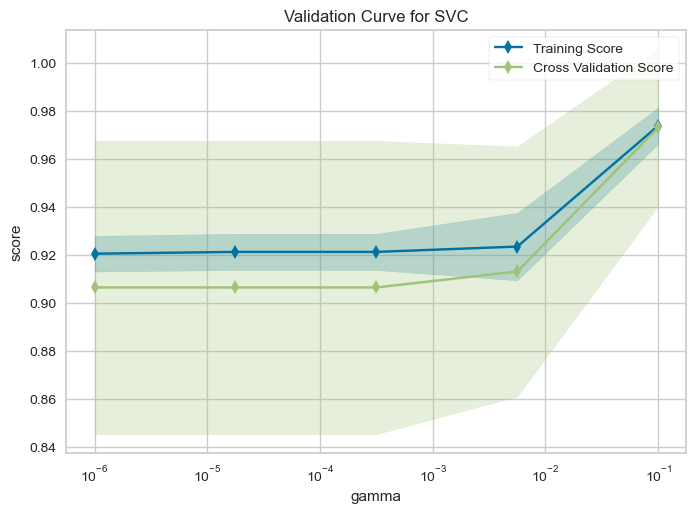

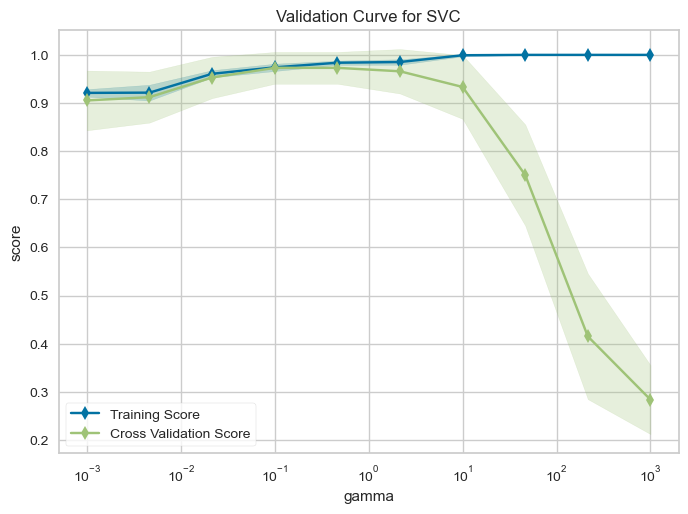

<AxesSubplot:title={'center':'Validation Curve for SVC'}, xlabel='gamma', ylabel='score'>

In [27]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.svm import SVC
import numpy as np

# 加载数据集和创建模型
# ...

# 创建验证曲线可视化
viz = ValidationCurve(
    SVC(), param_name="gamma", param_range=np.logspace(-6, -1, 5),
    logx=True, cv=10, scoring="accuracy"
)
viz_f1 = ValidationCurve(
    SVC(), param_name="gamma", param_range=np.logspace(-3, 3, 10),
    cv=10, scoring="f1_weighted", logx=True
)
# 训练和显示
viz.fit(X, y)
viz.show()

viz_f1.fit(X, y)
viz_f1.show()

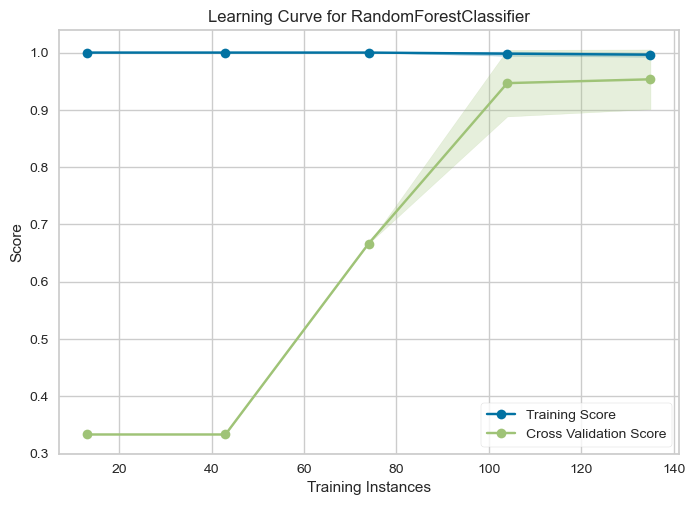

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [29]:
from yellowbrick.model_selection import LearningCurve

# 加载数据集和创建模型
# ...
# 创建学习曲线可视化
viz = LearningCurve(
    model, cv=10, scoring='accuracy'
)

# 训练和显示
viz.fit(X, y)
viz.show()

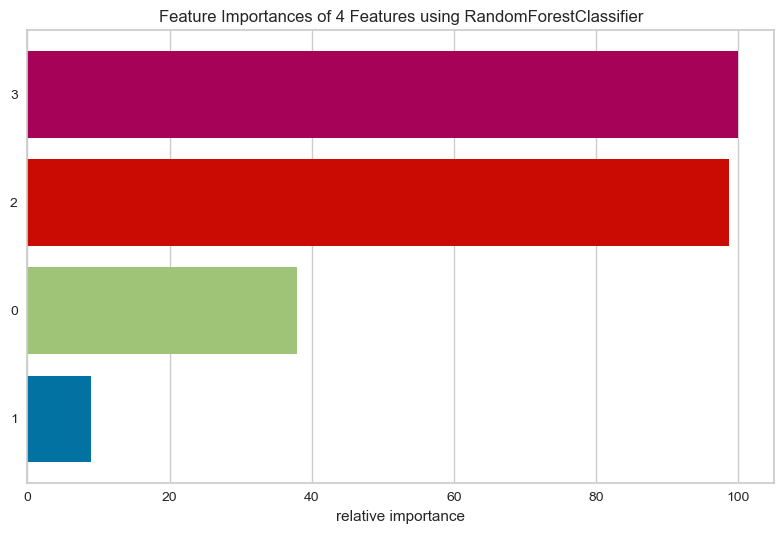

<AxesSubplot:title={'center':'Feature Importances of 4 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [21]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier

# 加载数据集和创建模型
# ...

# 创建模型
model = RandomForestClassifier(n_estimators=10)

# 创建特征重要性可视化
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()
